# EXPLORATION OF CREDIT CARD DEFAULT

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
def load_credit_card_data():
    """Reads the data and returns the design matrix and the target values.
    """

    nanDict = {}
    data = pd.read_excel("default_of_credit_card_clients.xls", header=1, skiprows=0, index_col=0, na_values=nanDict)
    design_matrix = data.drop(["default payment next month"], axis=1)
    targets = data["default payment next month"]
    targets = np.expand_dims(targets, axis = 1)
    # print(targets.shape)
    targets = np.reshape(targets, newshape=(-1,1))
    # print(targets.shape)
    return design_matrix, targets

In [4]:
data, targets = load_credit_card_data()

In [9]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


First we can look at the gender. We see that we have a slightly higher number of females compared to men. However, every sample is classified into one the two classes. 

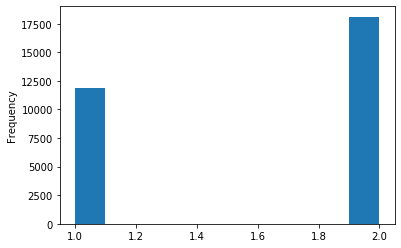

In [23]:
data["SEX"].plot.hist()

The gender values look fine and we have no unlabeled data points. 

We can then look at education. We are supposed to have classes numbered from 1 to 4, but we can see that we have a few more labels that we have to take care of. 

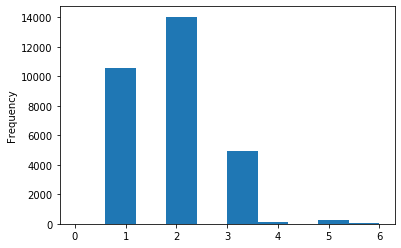

In [24]:
data["EDUCATION"].plot.hist()

In [25]:
data["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

We see that some of the samples are classified as 0, 5 and 6 which does not correspond to any of the described classes. They are either unlabeled or undocumented. We can put those into category 4 = other. 

In [35]:
id_5 = data["EDUCATION"] == 5
id_6 = data["EDUCATION"] == 6 
id_0 = data["EDUCATION"] == 0
temp = id_5 | id_6 | id_0
data.loc[temp, "EDUCATION"] = 4

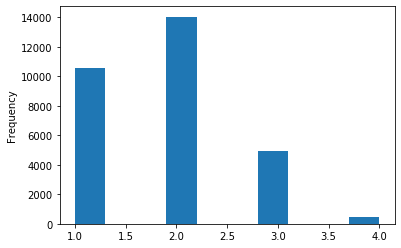

In [37]:
data["EDUCATION"].plot.hist()

We can now see that all of the samples have the right classes for education. The proportion of unlabeled and undocumented samples were so small, that it probably does not have to much inpact on the final results. 

The next step is to look at marriage. It is supposed to be either 1,2 or 3. 

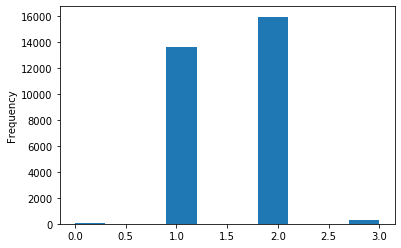

In [38]:
data["MARRIAGE"].plot.hist()

In [39]:
data["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

We see that we have an unlabeled class 0. Again, we can give this samples the label 3 for "other". 

In [44]:
id_0 = data["MARRIAGE"] == 0
data.loc[id_0, "MARRIAGE"] = 3

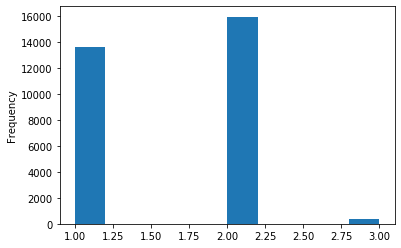

In [46]:
data["MARRIAGE"].plot.hist()

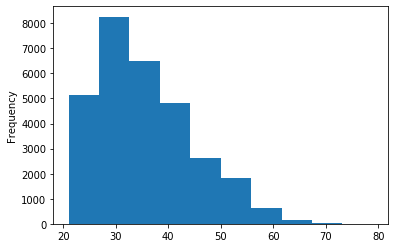

In [9]:
data["AGE"].plot.hist()

In [11]:
data["AGE"].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Age seems Ok. The age ranges from 21 to just below 79 with a higher amount of young people than old people. The mean age is around 35.

We can now look at the actual target values. The target value are defualt next month where 1 = yes and 0 = no. 

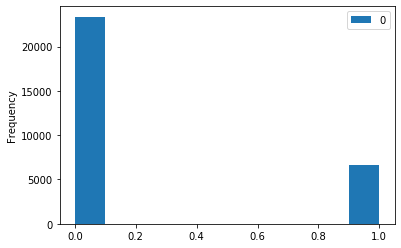

In [53]:
pd.DataFrame(targets).plot.hist()

In [19]:
# pd.DataFrame(targets).columns
print(pd.DataFrame(targets)[0].value_counts())

0    23364
1     6636
Name: 0, dtype: int64


In [21]:
zeros = 23364
ones = 6636
total = zeros + ones
print("Ratio of zeros = ", zeros/total )
print("Ratio of ones = ", ones/total)

Ratio of zeros =  0.7788
Ratio of ones =  0.2212


We see that we have higher number of 0's. This will make the accuracy score not very usefull when comparing models. A classifier that only predict 0's would still get an accuracy score of 0.7788. Therefore we need to use other measures of performance when comparing models. This is discussed in the project report. 

The next step is to make the work of the algorithms easier. We want the categorical variables to be one-hot encoded.

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [101]:
onehotencoder = OneHotEncoder(categories="auto")

design_matrix = ColumnTransformer(
[("", onehotencoder, [1,2,3]),],
remainder="passthrough"
).fit_transform(data)

(30000, 29)

In [99]:
design_matrix

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+03, 0.0000e+00,
        2.0000e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+03],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.2000e+03, 2.0000e+03,
        3.1000e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

In [22]:
temp2 = data[["SEX", "EDUCATION", "MARRIAGE"]]


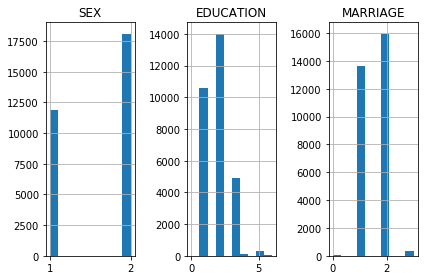

In [27]:
#Found code online for plotting the histograms: https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook#Data-exploration
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  
    
    
draw_histograms(temp2, temp2.columns, 1, 3, 10)
plt.savefig("Plots\histogram_categorical.png")
plt.show()

## We can now focus on the continuous features and look at their histograms. 

In [74]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

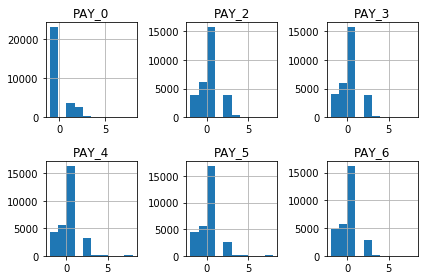

In [36]:
temp3 = data[["PAY_0", "PAY_2","PAY_3", "PAY_4", "PAY_5", "PAY_6" ]]
draw_histograms(temp3, temp3.columns, 2, 3, 10)
plt.savefig("Plots\histogram_pay.png")
plt.show()

There is something wrong here. They should only have labels -1 or 1-9. It seems like we have some with labels 0 and -2. However, I dont think -1 or -2 makes much sense for this feature. Since they have decided to label pay duly as -1, I will place all 0's and all -2's into 1. 

In [38]:
pay_0_index = (data["PAY_0"] == -2) | (data["PAY_0"] == 0)
pay_2_index = (data["PAY_2"] == -2) | (data["PAY_2"] == 0)
pay_3_index = (data["PAY_3"] == -2) | (data["PAY_3"] == 0)
pay_4_index = (data["PAY_4"] == -2) | (data["PAY_4"] == 0)
pay_5_index = (data["PAY_5"] == -2) | (data["PAY_5"] == 0)
pay_6_index = (data["PAY_6"] == -2) | (data["PAY_6"] == 0)
data.loc[pay_0_index, "PAY_0"] = -1
data.loc[pay_2_index, "PAY_2"] = -1
data.loc[pay_3_index, "PAY_3"] = -1
data.loc[pay_4_index, "PAY_4"] = -1
data.loc[pay_5_index, "PAY_5"] = -1
data.loc[pay_6_index, "PAY_6"] = -1





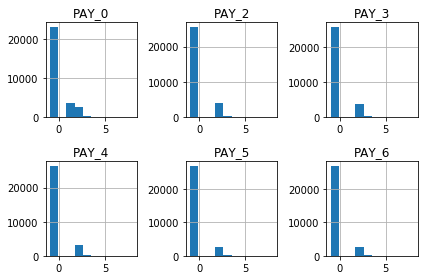

In [39]:
temp3 = data[["PAY_0", "PAY_2","PAY_3", "PAY_4", "PAY_5", "PAY_6" ]]
draw_histograms(temp3, temp3.columns, 2, 3, 10)
plt.savefig("Plots\histogram_pay.png")
plt.show()

We can now see that they are approriately labeled. 

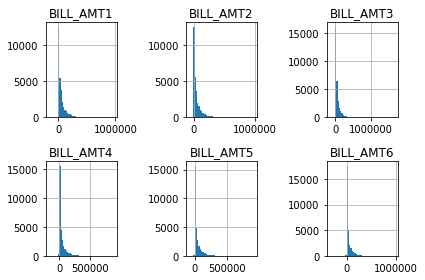

In [42]:
temp_bill_amt = data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]]
draw_histograms(temp_bill_amt, temp_bill_amt.columns, 2, 3, 50)
plt.savefig("Plots\histogram_bill_amt.png")
plt.show()

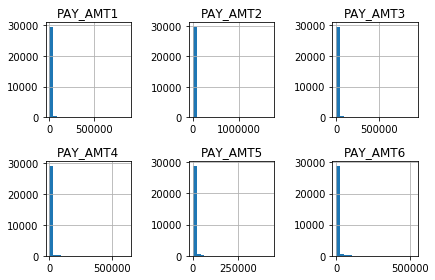

In [94]:
temp_pay_amt = data[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]]
draw_histograms(temp_pay_amt, temp_pay_amt.columns, 2,3,20)
plt.savefig("Plots\histogram_pay_amt.png")
plt.show()

## It is interesting to see how the different variables are correlated. 

In [55]:
import matplotlib.pyplot as plt 

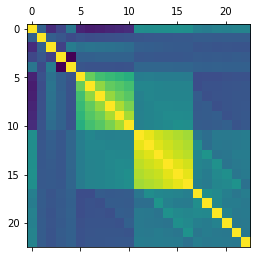

In [60]:
plt.matshow(data.corr())